In [83]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install audio_dspy
import audio_dspy as adsp
from scipy.special import spence
from IPython.core.display import SVG, Image, display
from skimage.measure import block_reduce

In [104]:
def plot_fft(x, fs, sm=1.0/24.0):
    fft = 20 * np.log10(np.abs(np.fft.rfft(x) + 1.0e-9))
    freqs = np.fft.rfftfreq(len(x), 1.0 / fs)
    return freqs, fft

def process_nonlin(fc, FS, nonlin, gain=10):
    N = 2000000
    tri = 10*np.arcsin(np.sin(2 * np.pi * fc / FS * np.arange(N)))
    y = nonlin(tri)
    freqs, fft = plot_fft(y, FS)
    return freqs, fft

def get_triangle(fc, FS, oversample = 16, duration = 4):
    t = np.arange(FS*oversample*duration)/(oversample*FS)
    tri = (2/np.pi)*np.arcsin(np.sin(2 * np.pi * fc *t))
    tri_decimated = signal.resample(tri,FS*duration)
    return t, tri_decimated

def hyperbolic(tri,k):
    gain = 10**(2*k)-1;
    ret = np.tanh(gain*tri)/np.tanh(gain);
    return ret

def downsample(x, FS, duration = 4):
    x = signal.resample(x, FS*duration)
    return x

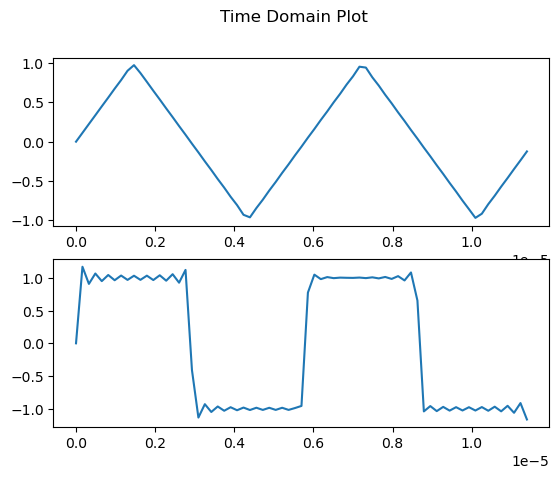

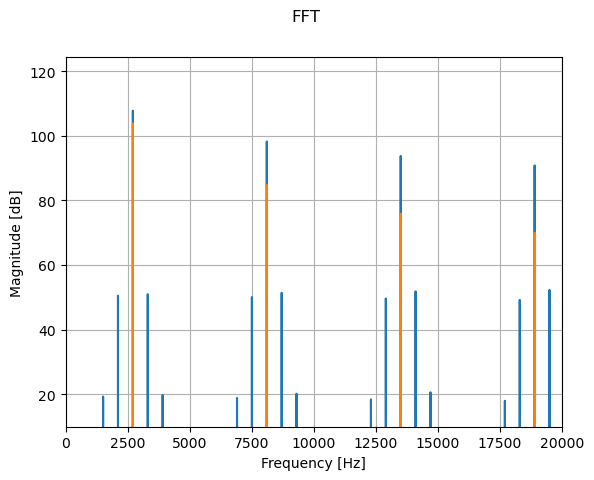

In [112]:
FS = 96000
fc = 2700
k = 1

t, tri = get_triangle(fc, FS*4)
hyper = hyperbolic(tri, k)
hyper = downsample(hyper, FS)
tri = downsample(tri, FS)
freqs_tri, fft_tri = plot_fft(tri, FS)
freqs_hyper, fft_hyper = plot_fft(hyper, FS)

fig, ax = plt.subplots(2)
fig.suptitle('Time Domain Plot')
ax[0].plot(t[0:round(2*FS/fc)], tri[0:round(2*FS/fc)])
ax[1].plot(t[0:round(2*FS/fc)], hyper[0:round(2*FS/fc)])



fig_fft, ax_fft = plt.subplots()
fig_fft.suptitle('FFT')
ax_fft.plot(freqs_hyper, fft_hyper)
ax_fft.plot(freqs_tri, fft_tri)

plt.xlim(0, 20000)
plt.ylim(10)
plt.ylabel('Magnitude [dB]')
plt.xlabel('Frequency [Hz]')
plt.grid()


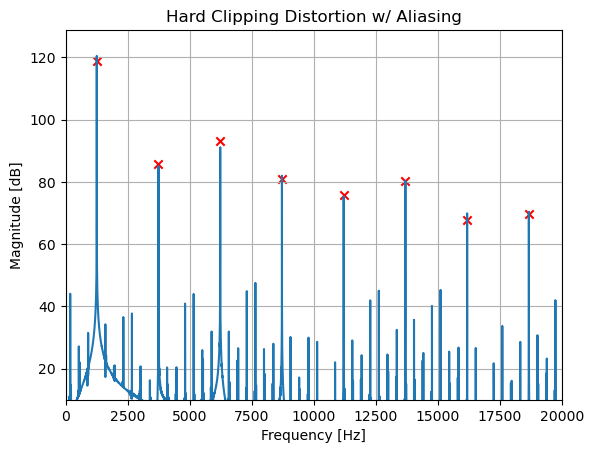

In [19]:
FC = 1244.5
FS = 96000

freqs_alias, fft_alias = process_nonlin(FC, FS, adsp.hard_clipper)
plt.plot(freqs_alias, fft_alias)
plt.scatter(freqs_analog[peak_idxs], fft_analog[peak_idxs], c='r', marker='x')
plt.xlim(0, 20000)
plt.ylim(10)
plt.title('Hard Clipping Distortion w/ Aliasing')
plt.ylabel('Magnitude [dB]')
plt.xlabel('Frequency [Hz]')
plt.grid()

In [25]:
FC = 2700
FS = 1920000

freqs_analog, fft_analog = process_nonlin(FC, FS, np.tanh)
peak_idxs = signal.find_peaks(fft_analog, 65)[0]
plt.plot(freqs_analog, fft_analog, label='no aliasing')
plt.scatter(freqs_analog[peak_idxs], fft_analog[peak_idxs], c='r', marker='x')

FS = 96000
freqs_alias, fft_alias = process_nonlin(FC, FS, np.tanh)
plt.plot(freqs_alias, fft_alias, label='aliasing')

plt.legend()
plt.xlim(0, 20000)
plt.ylim(10)
plt.title(r'$\tanh$ Distortion')
plt.ylabel('Magnitude [dB]')
plt.xlabel('Frequency [Hz]')
plt.grid()

TypeError: unsupported operand type(s) for *: 'int' and 'numpy.ufunc'